# Autoencoder
* https://medium.com/ai-academy-taiwan/what-are-autoencoders-175b474d74d1
* https://morvanzhou.github.io/tutorials/machine-learning/keras/2-6-autoencoder/
* https://github.com/MorvanZhou/tutorials/blob/master/kerasTUT/9-Autoencoder_example.py

In [23]:
SAVE_NAME = '1200_100dim'
HISTORY_SAVE = './history/' + SAVE_NAME + '.csv'
WEIGHTS_SAVE = './weight/' + SAVE_NAME + '.h5'

In [2]:
# Basic import
import os
import sys
import json
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Helper function
def writeProgress(msg, count, total):
    sys.stdout.write(msg + "{:.2%}\r".format(count/total))
    sys.stdout.flush()
    
def newPath(path):
    if not os.path.isdir(path):
        os.mkdir(path)

def read_json(src_path):
    with open(src_path, 'r') as json_file:
        data = json.load(json_file)
    return data

def write_json(data,dst_path):
    with open(dst_path, 'w') as outfile:
        json.dump(data, outfile)

In [4]:
from keras.models import Model
from keras.layers import Dense, Input
from sklearn.model_selection import train_test_split

C:\Users\TONYLAB\Anaconda3\envs\tensorflow-gpu\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\TONYLAB\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\TONYLAB\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Us

# Load data

In [5]:
df = pd.read_csv('followingMatrix.csv')
df

,movie,1091media,1eboniadams,1stweekendclub,20thcenturyfox,2chainz,2davisantos,2unesgrl,305_world,3bulldogges,...,zarhayes,zawe,zchao,zed_evans,zendaya,zeusluby,zoe.kazan,zoecolletti,zoesaldana,zooeyinthecity
0,47metersdown,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,adogsjourneymovie,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,aftermathmovie,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,aftermovie,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,alitamovie,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,angelhasfallen,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,angrybirdsmovie,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,annabellemovie,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,annamovie,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,apollo11movie,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
x_li = []
y_li = []
for i, row in df.iterrows():
    y_li.append(row['movie'])
    x_li.append(row.iloc[1:].tolist())
    
x = np.asarray(x_li)
y = np.asarray(y_li)
print(x.shape, y.shape)

(97, 2083) (97,)


In [28]:
from sklearn.preprocessing import MinMaxScaler
print(x)
scaler = MinMaxScaler()
scaler.fit(x)
train_scaled = scaler.transform(x)
print(train_scaled.shape)
print(train_scaled)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(97, 2083)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(train_scaled, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(77, 2083) (20, 2083)
(77,) (20,)


In [19]:
input_vec = 2083
encoding_dim = 100

In [20]:
input_dim = Input(shape = (input_vec, ))

# Encoder Layers
encoded1 = Dense(1200, activation = 'relu')(input_dim)
encoded2 = Dense(encoding_dim, activation = 'relu')(encoded1)

# Decoder Layers
decoded1 = Dense(1200, activation = 'relu')(encoded2)
decoded2 = Dense(input_vec, activation = 'sigmoid')(decoded1)

# Combine Encoder and Deocder layers
autoencoder = Model(inputs = input_dim, outputs = decoded2)
autoencoder.compile(optimizer = 'Adam', loss = 'binary_crossentropy')

In [21]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 2083)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1200)              2500800   
_________________________________________________________________
dense_6 (Dense)              (None, 100)               120100    
_________________________________________________________________
dense_7 (Dense)              (None, 1200)              121200    
_________________________________________________________________
dense_8 (Dense)              (None, 2083)              2501683   
Total params: 5,243,783
Trainable params: 5,243,783
Non-trainable params: 0
_________________________________________________________________


In [22]:
from keras.callbacks import EarlyStopping
callbacks = [EarlyStopping(monitor='val_loss')]

history = autoencoder.fit(X_train, X_train, nb_epoch = 100, batch_size = 50, validation_data = (X_test, X_test),shuffle = True, callbacks=callbacks)

C:\Users\TONYLAB\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Train on 77 samples, validate on 20 samples
Epoch 1/100
77/77 [==============================] - 0s 3ms/step - loss: 0.6921 - val_loss: 0.6829
Epoch 2/100
77/77 [==============================] - 0s 337us/step - loss: 0.6772 - val_loss: 0.6475
Epoch 3/100
77/77 [==============================] - 0s 324us/step - loss: 0.6223 - val_loss: 0.5568
Epoch 4/100
77/77 [==============================] - 0s 323us/step - loss: 0.4919 - val_loss: 0.3968
Epoch 5/100
77/77 [==============================] - 0s 311us/step - loss: 0.2993 - val_loss: 0.2261
Epoch 6/100
77/77 [==============================] - 0s 311us/step - loss: 0.1728 - val_loss: 0.1538
Epoch 7/100
77/77 [==============================] - 0s 337us/step - loss: 0.1440 - val_loss: 0.1688


In [24]:
autoencoder.save(WEIGHTS_SAVE)

In [25]:
# save history
# acc = history.history['acc']
# val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

his_df = pd.DataFrame(data = {
    'Epoch' : epochs,
    'Loss' : loss,
#     'Acc' : acc,
    'Val_loss' : val_loss#,
#     'Val_acc' : val_acc
})
his_df = his_df[['Epoch', 'Loss','Val_loss']]
his_df.to_csv(HISTORY_SAVE, index = False)

In [26]:
encoder = Model(inputs = input_dim, outputs = encoded2)

encoded_train = pd.DataFrame(encoder.predict(train_scaled))
userContent=np.array(encoded_train)

encoded_train = encoded_train.add_prefix('feature_')
print(encoded_train.shape)
encoded_train #.head()

(97, 100)


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99
0,0.477774,0.233613,0.571170,0.490383,0.442315,0.572293,0.471812,0.503866,0.478843,0.632991,...,0.354608,0.666907,0.653976,0.647461,0.216783,0.274423,0.174229,0.350848,0.553327,0.509222
1,2.246158,0.805918,2.072047,1.129771,2.410896,2.809375,1.883687,1.644976,1.698793,2.076909,...,1.988512,1.842959,2.854409,3.242362,0.959303,0.306254,0.392945,1.608094,2.320610,2.305279
2,0.215454,0.067095,0.254939,0.153527,0.173851,0.283978,0.200754,0.288878,0.207719,0.267859,...,0.176763,0.198757,0.291706,0.277385,0.113916,0.089789,0.054672,0.171070,0.302141,0.318903
3,1.779699,0.490695,2.043140,1.940065,1.328020,2.205338,1.971378,2.525554,2.662099,2.866169,...,1.049990,1.509033,2.460900,3.343600,1.521163,0.417315,0.287506,2.119750,2.008902,1.508441
4,0.699920,0.140666,0.913766,0.431069,0.607442,0.834614,0.821256,0.999226,0.757825,0.776313,...,0.560910,0.882284,0.791238,0.915884,0.498901,0.268220,0.208438,0.647770,0.875218,0.703400
5,1.064362,0.243953,1.239942,0.748929,0.656920,1.100324,1.034911,1.382130,0.749484,1.390008,...,0.896003,0.922361,1.146715,1.486306,0.638996,0.207525,0.304080,0.782894,1.477137,1.124278
6,1.706057,0.360585,1.705806,1.037985,1.825550,1.776149,1.298324,1.784014,1.441650,2.292957,...,1.222852,1.607934,2.458824,2.212395,0.763386,0.421231,0.493745,1.746225,2.022004,1.944058
7,1.135469,0.365266,1.523089,0.630639,0.994898,1.230030,1.265572,0.872206,1.240425,1.440071,...,0.816980,1.393464,1.341951,1.332531,0.710824,0.372287,0.357418,0.683391,1.121753,1.059990
8,0.523042,0.102566,0.450578,0.267841,0.474175,0.588450,0.385678,0.595351,0.468219,0.537131,...,0.428140,0.453357,0.622993,0.562289,0.295090,0.084593,0.178683,0.403307,0.575398,0.554050
9,0.327859,0.130382,0.381241,0.266784,0.303247,0.421025,0.290813,0.409321,0.269803,0.446754,...,0.291156,0.319088,0.483004,0.466264,0.146469,0.037604,0.132732,0.264354,0.427317,0.423275


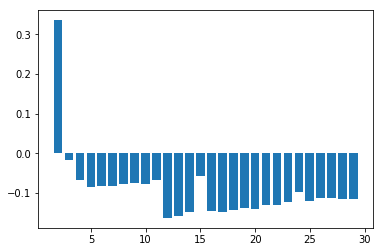

[0.33512607520502047, -0.017528071561650486, -0.06671632161894787, -0.08545009364295955, -0.08176633102843933, -0.08165943832269518, -0.07835020471330637, -0.07407345548661431, -0.07678096060844322, -0.06823296295932885, -0.16295877513632323, -0.15713000022594356, -0.1486601657191072, -0.05780584476623779, -0.14579688468509125, -0.1477588888893027, -0.14422266936542044, -0.13700292552419369, -0.14059638128933216, -0.1305340573339785, -0.13026449056366562, -0.12341475404934628, -0.09762204357679277, -0.11918367723631532, -0.11233697516458474, -0.11217397197683063, -0.11601482859534556, -0.11600949442551345]


In [27]:
from sklearn import cluster, datasets, metrics
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

silhouette_avgs = []
ks = range(2, 30)

for k in ks:
    kmeans_fit = cluster.KMeans(n_clusters = k).fit(encoded_train)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(train_scaled, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

# 作圖並印出 k = 2 到 30 的績效
plt.bar(ks, silhouette_avgs)
plt.show()
print(silhouette_avgs)